In [13]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pylab as plt

In [2]:
df_freelancer_raw = pd.read_csv('input/FreeLancerT.csv')
df_freelancer_raw

,Country,CountryCode,Continent,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,Aruba,ABW,NaN,1.918226,NaN,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,Angola,AGO,AF,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,Albania,ALB,EU,7.783173,0.241072,NaN,0.551021,6.956642,0.241072,12.397975,0.860970
3,Andorra,AND,EU,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,United Arab Emirates,ARE,AS,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...,...,...,...
185,Vanuatu,VUT,OC,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,Samoa,WSM,OC,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,Yemen Rep.,YEM,AS,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,South Africa,ZAF,AF,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


In [3]:
df_freelancer_numerical = df_freelancer_raw.iloc[:, 3:]
for column in df_freelancer_numerical.columns:
    if is_numeric_dtype(df_freelancer_numerical[column]) and df_freelancer_numerical[column].isna().any():
        df_freelancer_numerical[column].fillna(df_freelancer_numerical[column].mean(), inplace=True)
df_freelancer_numerical

/run/user/1000/ipykernel_30745/2130309872.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freelancer_numerical[column].fillna(df_freelancer_numerical[column].mean(), inplace=True)


,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...
185,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


### 0_ Standardizam datele

In [4]:
scaler = StandardScaler()
df_freelancer_scaled = pd.DataFrame(scaler.fit_transform(df_freelancer_numerical), 
                                    columns=df_freelancer_numerical.columns)
df_freelancer_scaled

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829
...,...,...,...,...,...,...,...,...
185,-0.299677,-4.197456e-01,-0.590109,-0.179024,-0.503275,-0.468369,-0.581629,-0.196686
186,-0.045226,-4.197456e-01,-0.282686,0.022531,0.168516,-0.468369,-0.184682,0.000191
187,-0.349416,-4.197456e-01,-0.631082,-0.176170,-0.554730,-0.468369,-0.676208,-0.195292
188,-0.271761,-3.380735e-01,-0.470248,-0.169753,-0.429585,-0.387449,-0.529745,-0.181361


### 1_ Calcul Ierarhie (Matricea de ierarhie)
- Pentru a calcula matricea de ierarhie se foloseste libraria scipy
- Matricea de ierarhie are 4 componente, fiecare pe cate un index 
    - Componenta 1 (index 0) --> primul cluster care intra in merge
    - Componenta 2 (index 1) --> al doilea cluster care intra in merge
    - Componenta 3 (index 2) --> masoarea similaritatea intre clusteri 
    - Componenta 4 (index 3) --> arata cate puncte de date noi au fost formate in cluster

In [5]:
linkage_matrix = linkage(df_freelancer_scaled, method='ward')
for i, merge in enumerate(linkage_matrix):
    cluster1 = merge[0]
    cluster2 = merge[1]
    similarity = merge[2]
    newly_created_points = merge[3]
    #datele se printeaza...
linkage_matrix

array([[1.16000000e+02, 1.28000000e+02, 7.85440749e-04, 2.00000000e+00],
       [1.20000000e+01, 1.90000000e+02, 1.00274677e-03, 3.00000000e+00],
       [1.18000000e+02, 1.74000000e+02, 1.51728771e-03, 2.00000000e+00],
       [1.24000000e+02, 1.54000000e+02, 2.59125820e-03, 2.00000000e+00],
       [1.50000000e+01, 1.41000000e+02, 2.74792679e-03, 2.00000000e+00],
       [5.40000000e+01, 7.90000000e+01, 3.21632677e-03, 2.00000000e+00],
       [3.00000000e+01, 1.94000000e+02, 3.91628156e-03, 3.00000000e+00],
       [3.70000000e+01, 1.91000000e+02, 4.07617899e-03, 4.00000000e+00],
       [1.57000000e+02, 1.87000000e+02, 4.73418807e-03, 2.00000000e+00],
       [1.50000000e+02, 1.66000000e+02, 5.66645723e-03, 2.00000000e+00],
       [6.80000000e+01, 1.89000000e+02, 6.17877240e-03, 2.00000000e+00],
       [1.96000000e+02, 1.97000000e+02, 6.25981799e-03, 7.00000000e+00],
       [1.22000000e+02, 1.69000000e+02, 7.86755389e-03, 2.00000000e+00],
       [1.92000000e+02, 1.98000000e+02, 8.00190788e

### 2_ Metoda Elbow pentru determinarea unui cluster optim 
Ideea in spatele la Elbow_Merge este de a da merge la grupuri de elemente cu distante mici intre ele si de a ne opri atunci cand ajungem la distanta maxima intre elemente. Astfel, toate grupurile mici au fost puse intr-un cluster pentru ca au similitudini mari
- Pentru a determina un cluster optim folosind metoda Elbow ne uitam la componenta 3 a matricii de ierarhie --> similitudinea sau distanta
- Iteram prin componenta 3 si calculam diferentele intre distantele (similitudiniile) succesive
- Selectam index-ul la care are loc diferenta intre distante cu valoarea maxima --> am gasit elbow_position
    - Elbow position arata separarea intre clusteri --> pozitia pana la care putem sa formam clusteri 
- Pentru fiecare linie din matricea ierarhica, primele doua componente (index 0 si index 1) arata clusterele in care se da merge
    - Iteram prin linii si incepem sa dam merge la clustere, asignand noi id-uri pentru fiecare merge nou. 
        - Un id nou are forma: numar total de linii din matrice + nr_merge_curent 
    - Se face o masca care updateaza in vector cluster_assignments id-urile corespunzatoare 
        - Exemplu rulare. Fie cluster_assignments = [0,1,2,3,4,5] initial. Presupunem ca eblow_position se alfa pe index-ul 5
        - Prima iteratie --> [6,6,2,3,4,5]
        - A doua iteratie --> [6,6,7,7,4,5]
        - A teria iteratie --> [8,8,8,8,4,5]
    - S-au obtinut trei clustere 8,4,5
- Alte metrici care se pot calcula:
    - Numarul de clustere rezultate = total_points - elbow_position
    - Distance threshold = avg(mat_ierarhie[elbow_postion][2] + mat_ierarhie[elbow_position - 1][2])


In [6]:
total_points = linkage_matrix.shape[0] + 1  # Total number of initial data points
# Implement elbow method to find optimal number of clusters
# Calculate differences between consecutive merge distances
# Initialize an array to store our distance differences
num_steps = total_points - 2  # We'll have this many differences
distance_differences = np.zeros(num_steps)

# Calculate each difference between consecutive merge distances
for i in range(num_steps):
    current_distance = linkage_matrix[i+1, 2]   # Distance of the (i+1)th merge
    previous_distance = linkage_matrix[i, 2]    # Distance of the ith merge
    distance_differences[i] = current_distance - previous_distance

# Find the merger that creates the largest distance jump
elbow_position = np.argmax(distance_differences) + 1 
num_clusters = total_points - elbow_position

# Calculate distance threshold between last valid merge and next merge
distance_threshold = (linkage_matrix[elbow_position, 2] + 
                    linkage_matrix[elbow_position - 1, 2]) / 2

# Initialize cluster assignments - start with each point in its own cluster
cluster_assignments = np.arange(total_points)

# Perform cluster merging based on hierarchy
for merge_step in range(elbow_position):
    cluster_to_merge_1 = linkage_matrix[merge_step, 0]  # First cluster ID in matrix row
    cluster_to_merge_2 = linkage_matrix[merge_step, 1]  # Second cluster ID in matrix row
    
    # Assign new cluster ID to all points in both clusters
    new_cluster_id = total_points + merge_step
    cluster_assignments[cluster_assignments == cluster_to_merge_1] = new_cluster_id
    cluster_assignments[cluster_assignments == cluster_to_merge_2] = new_cluster_id

# Optional pentru formatare mai frumoasa
unique_cluster_notations = np.unique(cluster_assignments)
for i in range(len(cluster_assignments)):
    for j in range(len(unique_cluster_notations)):
        if cluster_assignments[i] == unique_cluster_notations[j]:
            cluster_assignments[i] = j + 1

print(elbow_position)
print(cluster_assignments)
print(distance_threshold)

186
[2 2 3 3 3 2 4 3 2 3 2 2 2 2 2 2 3 3 2 2 3 4 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 2 2 3 2 2 2 2 2 2 3 2 3 2 2 1 2 3 3 2 4 2 2 2 3 2 2 2
 2 2 3 2 3 2 3 2 2 2 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 2 2 3
 3 2 2 2 4 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 2 3 2 3 2 2 3 2 2 3 2 3 2 2 2
 3 3 2 2 2 3 2 2 2 2 3 2 2 2 3 3 2 2 2 2 2 2 2 2 3 2 2 2 4 3 3 2 2 2 2 2 2
 2 2 2 2 2]
16.18737442656655


### 3_ Calcul partitie oarecare
- In calculul cu partitia oarecare, elbow position se determina ca fiind total_points - numarul de partitii date
- Numarul de partii date este o valoare hardcodata
- Restul logicii e la fel  

In [7]:

## Daca pun num_partitions = 4 voi fi in cazul in optimal!
num_partitions = 5
total_points = linkage_matrix.shape[0] + 1  # Total number of initial data points

elbow_position = total_points - num_partitions
cluster_assignments = np.arange(total_points)

for merge_step in range(elbow_position):
    cluster_to_merge_1 = linkage_matrix[merge_step, 0]
    cluster_to_merge_2 = linkage_matrix[merge_step, 1]

    new_cluster_id = total_points + merge_step

    cluster_assignments[cluster_assignments == cluster_to_merge_1] = new_cluster_id
    cluster_assignments[cluster_assignments == cluster_to_merge_2] = new_cluster_id

#optional pentru formatare mai frumoasa
unique_cluster_notations = np.unique(cluster_assignments)
for i in range(len(unique_cluster_notations)):
    for j in range(len(cluster_assignments)):
        if cluster_assignments[j] == unique_cluster_notations[i]:
            cluster_assignments[j] = i + 1

distance_threshold = (linkage_matrix[elbow_position, 2] + linkage_matrix[elbow_position-1, 2])/2

print(cluster_assignments)    
print(distance_threshold)

[3 3 5 5 5 3 1 5 3 5 3 3 3 3 3 3 5 5 3 3 5 4 3 3 3 3 3 3 5 3 3 5 5 3 3 3 3
 3 3 3 3 3 3 3 5 5 5 3 3 5 3 3 3 3 3 3 5 3 5 3 3 2 3 5 5 3 4 3 3 3 5 3 3 3
 3 3 5 3 5 3 5 3 3 3 5 5 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 5 5 5 3 3 5
 5 3 3 3 4 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 5 5 3 5 3 5 3 3 5 3 3 5 3 5 3 3 3
 5 5 3 3 3 5 3 3 3 3 5 3 3 3 5 5 3 3 3 3 3 3 3 3 5 3 3 3 4 5 5 3 3 3 3 3 3
 3 3 3 3 3]
10.609775578974247


### 4_ Index Silhouette la nivel de partite si instanta 
Indecsi Silhouette sunt folositi pentru a determina cat de bine au fost format clusterii rezultati din procedeele elbow. 
Indecsi iau valori intre -1 si 1. Cu cat mai aproape este un index de 1, cu atat mai bine este format clusterul 
- Pentru nivel de partitie se foloseste silhouette_samples care setul de date numeric si array-ul de clustere formate la punctul (2) sau (3) 
    - Reprezinta scorul per cluster
- Pentru nivel de instanta se foloseste silhouette_score cu aceeasi parametrii ca silhouette_samples
    - Reprezinta scorul per toate clusterele

In [8]:
silhouette_partitie = silhouette_samples(df_freelancer_scaled, cluster_assignments)
dataframe_silhouette = pd.DataFrame()
dataframe_silhouette['partitie_optimala'] = cluster_assignments
dataframe_silhouette['silhouette_partitie'] = silhouette_partitie
dataframe_silhouette

,partitie_optimala,silhouette_partitie
0,3,0.593687
1,3,0.863584
2,5,0.203000
3,5,0.009308
4,5,0.007537
...,...,...
185,3,0.871352
186,3,0.639850
187,3,0.865635
188,3,0.862766


In [9]:
silhouette_instance = silhouette_score(df_freelancer_scaled, cluster_assignments)
silhouette_instance

0.6065364607087972

### 5_ Trasare plot dendograma
- Pentru a trasa plotul dendograma se foloseste libraria scipy 
- Graficul primeste ca si parametru matricea ierarhie calculata la (1) si distance_treshold calculat la (2) sau (3)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [40.0, 40.0, 71.25, 71.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [122.5, 122.5, 153.75, 153.75],
  [105.0, 105.0, 138.125, 138.125],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [260.0, 260.0, 290.0, 290.0],
  [240.0, 240.0, 275.0, 275.0],
  [210.0, 210.0, 257.5, 257.5],
  [185.0, 185.0, 233.75, 233.75],
  [121.5625, 121.5625, 209.375, 209.375],
  [55.625, 55.625, 165.46875, 165.46875],
  [20.0, 20.0, 110.546875, 110.546875],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365

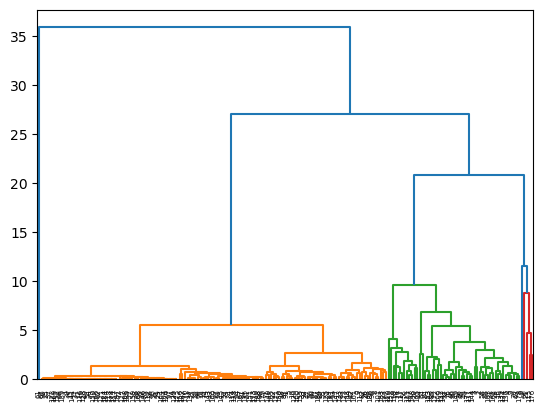

In [11]:
dendrogram(linkage_matrix,
           color_threshold=distance_threshold)

### 6_ Plot indecsi Silhuette partitie
!! Se face cu sikitplot.silhuette

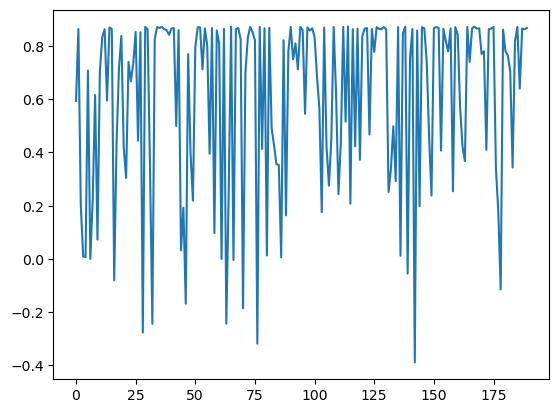

In [16]:
fig, ax = plt.subplots()
ax.plot(silhouette_samples(df_freelancer_scaled, cluster_assignments))
plt.show()